<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Convection-linéaire" data-toc-modified-id="Convection-linéaire-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Convection linéaire</a></span></li><li><span><a href="#Convection-non-linéaire" data-toc-modified-id="Convection-non-linéaire-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convection non-linéaire</a></span></li><li><span><a href="#Convergence-et-condition-CFL" data-toc-modified-id="Convergence-et-condition-CFL-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convergence et condition CFL</a></span></li><li><span><a href="#Diffusion-1D" data-toc-modified-id="Diffusion-1D-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Diffusion 1D</a></span></li><li><span><a href="#Equation-de-Burger" data-toc-modified-id="Equation-de-Burger-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Equation de Burger</a></span><ul class="toc-item"><li><span><a href="#Condition-initiale-et-conditions-aux-limites" data-toc-modified-id="Condition-initiale-et-conditions-aux-limites-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Condition initiale et conditions aux limites</a></span></li></ul></li><li><span><a href="#Convection-linéaire-en-dimension-2" data-toc-modified-id="Convection-linéaire-en-dimension-2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Convection linéaire en dimension 2</a></span></li><li><span><a href="#2-D-Convection" data-toc-modified-id="2-D-Convection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2-D Convection</a></span><ul class="toc-item"><li><span><a href="#Conditions-initiales" data-toc-modified-id="Conditions-initiales-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Conditions initiales</a></span></li><li><span><a href="#Conditions-aux-limites" data-toc-modified-id="Conditions-aux-limites-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Conditions aux limites</a></span></li></ul></li><li><span><a href="#2D-Diffusion" data-toc-modified-id="2D-Diffusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>2D Diffusion</a></span></li><li><span><a href="#Burgers'-Equation-in-2D" data-toc-modified-id="Burgers'-Equation-in-2D-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Burgers' Equation in 2D</a></span></li><li><span><a href="#Équation-de-Laplace-2D" data-toc-modified-id="Équation-de-Laplace-2D-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Équation de Laplace 2D</a></span><ul class="toc-item"><li><span><a href="#Exercice" data-toc-modified-id="Exercice-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Exercice</a></span></li></ul></li><li><span><a href="#Équation-de-Poisson-2D" data-toc-modified-id="Équation-de-Poisson-2D-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Équation de Poisson 2D</a></span></li><li><span><a href="#Écoulement-de-la-cavité-avec-Navier–Stokes" data-toc-modified-id="Écoulement-de-la-cavité-avec-Navier–Stokes-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Écoulement de la cavité avec Navier–Stokes</a></span><ul class="toc-item"><li><span><a href="#Discrétisation-des-équations" data-toc-modified-id="Discrétisation-des-équations-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Discrétisation des équations</a></span></li><li><span><a href="#Résolution" data-toc-modified-id="Résolution-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Résolution</a></span></li></ul></li></ul></div>

\section{Convection linéaire}

L'équation de convection linéaire 1-D est le modèle le plus simple permettant d'illustrer les enjeux numériques de la résolution numérique des équations de Navier-Stokes

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

Avec des conditions initiales données (comprises comme une *onde*), l'équation représente la propagation de cette *onde* initiale avec la vitesse $c$, sans changement de forme. Soit la condition initiale $u(x,0)=u_0(x)$. Alors la solution exacte de l'équation est $u(x,t)=u_0(x-ct)$.

Nous discrétisons cette équation à la fois dans l'espace et dans le temps, en utilisant le schéma de différence avant pour la dérivée temporelle et le schéma de différence arrière pour la dérivée spatiale. Envisagez de discrétiser la coordonnée spatiale $x$ en points que nous indexons de $i=0$ à $N$, et de progresser par intervalles de temps discrets de taille $\Delta t$.

De la définition d'une dérivée (et en supprimant simplement la limite), nous savons que :

$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$

Notre équation discrète est donc :

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Où $n$ et $n+1$ sont deux étapes consécutives dans le temps, tandis que $i-1$ et $i$ sont deux points voisins de la coordonnée $x$ discrétisée. Si on donne des conditions initiales, alors la seule inconnue dans cette discrétisation est $u_i^{n+1}$. Nous pouvons résoudre notre inconnue pour obtenir une équation qui nous permet d'avancer dans le temps, comme suit :

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Essayons maintenant de l'implémenter en Python.

Nous allons commencer par importer quelques bibliothèques pour nous aider.

*`numpy` est une bibliothèque qui fournit un tas d'opérations matricielles utiles similaires à MATLAB* `matplotlib` est une bibliothèque de traçage 2D que nous utiliserons pour tracer nos résultats
* `time` et `sys` fournissent des fonctions de synchronisation de base que nous utiliserons pour ralentir les animations pour la visualisation

In [1]:
import numpy                       #chargement de numpy (calcul)
from matplotlib import pyplot      #chargement de matplotlib (graphiques)
import time, sys                   #chargement des utilitaires
%matplotlib inline

Nous avons besoin de définir quelques variables nécessaires à la résolution numérique de l'équation

In [2]:
nx = 41          # discrétisation : nombre de point pour décrire le domaine
dx = 2 / (nx-1)  # distance entre 2 points
nt = 25          # nombre de pas de temps à réaliser
dt = .025        # pas de temps
c = 1            # vitesse de propagation de l'onde

Pour résoudre l'quation, il est nécessaire de déinir les coniditons initiales. La vitesse initiale $u_0$ est donnée par $u = 2$ dans l'intervalle $0.5 \leq x \leq 1$ et $u = 1$ partout ailleurs dans $(0,2)$ (c'est-à-dire une fonction chapeau).

In [3]:
u = numpy.ones(nx)
u[int(.5 / dx):int(1 / dx + 1)] = 2
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


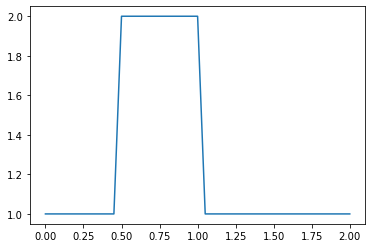

In [4]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

Il est maintenant temps d'implémenter la discrétisation de l'équation de convection en utilisant un schéma aux différences finies.

Pour chaque élément de notre tableau `u`, nous devons effectuer l'opération $u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$

Nous stockerons le résultat dans un nouveau tableau (temporaire) `un`, qui sera la solution $u$ pour le prochain pas de temps. Nous répéterons cette opération pour autant de pas de temps que nous spécifierons et nous pourrons alors voir jusqu'où l'onde a convecté.

Nous initialisons d'abord notre tableau d'espace réservé `un` pour contenir les valeurs que nous calculons pour le pas de temps $n+1$, en utilisant à nouveau la fonction NumPy `ones()`.

Ensuite, nous pouvons penser que nous avons deux opérations itératives : une dans l'espace et une dans le temps (nous apprendrons différemment plus tard), alors nous commencerons par imbriquer une boucle dans l'autre. Notez l'utilisation de la fonction astucieuse `range()`. Lorsque nous écrivons : `for i in range(1,nx)` nous parcourrons le tableau `u`, mais nous sauterons le premier élément (le zéro-ième élément).

In [5]:
un = numpy.ones(nx)                # initialisation du champ de l'itération n

for n in range(nt):                # itération en temps
    un = u.copy()                  # copie de l'itération précédente dans la valeur courante
    for i in range(nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

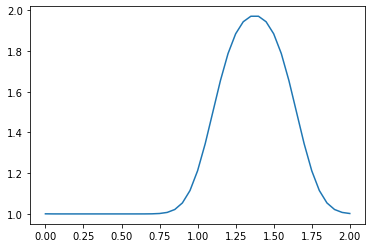

In [6]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

\section{Convection non-linéaire}

Nous allons maintenant implémenter la convection non linéaire en utilisant les mêmes méthodes qu'à l'étape 1. L'équation de convection 1D est :

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Au lieu d'un facteur constant $c$ multipliant le deuxième terme, nous avons maintenant la solution $u$ le multipliant. Ainsi, le deuxième terme de l'équation est maintenant *non linéaire*. Nous allons utiliser la même discrétisation qu'à l'étape 1 - différence avant dans le temps et différence arrière dans l'espace. Voici l'équation discrétisée.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

La résolution du seul terme inconnu, $u_i^{n+1}$, donne :

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

Comme précédemment, le code Python commence par charger les bibliothèques nécessaires. Ensuite, nous déclarons quelques variables qui déterminent la discrétisation dans l'espace et dans le temps (vous devriez expérimenter en modifiant ces paramètres pour voir ce qui se passe). Ensuite, nous créons la condition initiale $u_0$ en initialisant le tableau pour la solution en utilisant $u = 2\ @\ 0.5 \leq x \leq 1$ et $u = 1$ partout ailleurs dans $(0,2)$ (c'est-à-dire une fonction chapeau).

In [7]:
u = numpy.ones(nx)                 # initialisation du vecteur solution de l'équation
u[int(.5/dx):int(1 / dx + 1)] = 2  # définition de la condtion initiale

un = numpy.ones(nx)                # initialisation du champ de l'itération n

**Question** Ecrire la résolution de l'équation de convection non linéaire.

# Convergence et condition CFL


Pour les premières étapes, nous avons utilisé les mêmes conditions générales initiales et aux limites. Avec les paramètres que nous avons initialement proposés, la grille comporte 41 points et le pas de temps est de 0,25 seconde. Maintenant, nous allons expérimenter l'augmentation de la taille de notre grille. Le code ci-dessous est identique au code que nous avons utilisé dans [Step 1](./01_Step_1.ipynb), mais ici, il a été regroupé dans une fonction afin que nous puissions facilement examiner ce qui se passe comme nous ajustons une seule variable : **la taille de la grille**.

In [8]:
def convection(nx):
    dx = 2 / (nx-1)  # distance entre 2 points
    nt = 25          # nombre de pas de temps à réaliser
    dt = .025        # pas de temps
    c = 1            # vitesse de propagation de l'onde

    u = numpy.ones(nx)                 # initialisation du vecteur solution de l'équation
    u[int(.5/dx):int(1 / dx + 1)] = 2  # définition de la condtion initiale

    un = numpy.ones(nx)                # initialisation du champ de l'itération n
    for n in range(nt):                # iteration en temps
        un = u.copy()                  # copie de l'itération précédente
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u);

**Question** 
Executer la fonction en faisant varier le nombre de point de discrétisation entre $40$ et $90$.

**Question**
Qu'observer vous?

Afin d'expliquer ce que l'on observe, il faut analyser la manière dont les itérations se déroulent.

Lors d'une itération en temps, nous utilisons les informations transportées par l'équation, ce qui permet d'évaluer le champs de vitesse au pas de temps suivant.

La diminution du pas d'espace, c'est à dire l'augmentation du nombre de point de discrétisation permet d'améliorer la qualité de la solution. La forme initiale de l'onde de vitese est conservée.

A chaque itération, l'onde de vitesse parcourt une distance égale à $c*\Delta t$. Si cette distance est supèrieur à $dx$, l'information de l'onde n'est pas suffisament précise aux points de discrétisations. Il faut donc dériver une condition de stabilité de l'équation.

$$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{\max}$$

où $u$ est la vitesse de l'onde ; $\sigma$ est appelé le **nombre de Courant** et la valeur de $\sigma_{\max}$ qui assurera la stabilité dépend de la discrétisation utilisée.

Dans ce qui suit, nous utiliserons le nombre CFL pour calculer un pas de temps approprié `dt` en fonction de la taille de `dx`.

\section{Diffusion 1D}

L'équation de diffusion unidimensionnelle est :

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

La dérivée du second ordre peut être représentée géométriquement comme la ligne tangente à la courbe donnée par la dérivée première. Nous allons discrétiser la dérivée du second ordre avec un schéma de différence centrale : une combinaison de différence avant et de différence arrière de la dérivée première. Considérez le développement de Taylor de $u_{i+1}$ et $u_{i-1}$ autour de $u_i$ :

$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

Si nous additionnons ces deux développements, vous pouvez voir que les termes dérivés impairs s'annuleront. Si nous négligeons tous les termes de $O(\Delta x^4)$ ou plus (et vraiment, ceux-ci sont très petits), alors nous pouvons réorganiser la somme de ces deux expansions pour résoudre notre dérivée seconde.

$u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\bigg|_i + O(\Delta x^4)$

Ensuite, réorganisez pour résoudre pour $\frac{\partial ^2 u}{\partial x^2}\bigg|_i$ et le résultat est :

$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$.

On peut maintenant écrire la version discrétisée de l'équation de diffusion en 1D :

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

Comme précédemment, nous remarquons qu'une fois que nous avons une condition initiale, la seule inconnue est $u_{i}^{n+1}$, nous réorganisons donc l'équation en résolvant notre inconnue :

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

L'équation discrète ci-dessus nous permet d'écrire un programme pour avancer une solution dans le temps. Mais nous avons besoin d'une condition initiale. Nous utiliserons dans un premier temps la fonction chapeau. 

Donc, à $t=0$, $u=2$ dans l'intervalle $0.5\le x\le 1$ et $u=1$ partout ailleurs.

**Question** Ecrire une fonction qui permet de résoudre l'équation de diffusion.

In [9]:
def diffusion(nx):
    return 0

\section{Equation de Burger}
L'équation de Burgers, une simplification des équations de Navier-Stokes, dans une dimension spatiale s'écrit  :

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$

C'est une combinaison de convection non linéaire et de diffusion.

Nous pouvons le discrétiser en utilisant les méthodes que nous avons déjà détaillées dans les étapes précédents. En utilisant la différence avant pour le temps, la différence arrière pour l'espace et notre méthode du 2e ordre pour les dérivées secondes, on obtient :

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

Comme précédemment, une fois que nous avons une condition initiale, la seule inconnue est $u_i^{n+1}$. Nous avancerons dans le temps comme suit :

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

\subsection{Condition initiale et conditions aux limites}

Pour examiner certaines propriétés intéressantes de l'équation de Burgers, il est utile d'utiliser des conditions initiales et aux limites différentes de celles que nous avons utilisées pour les étapes précédentes.

La condition initiale pour ce problème va être :

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)
\end{eqnarray}

Celle-ci admet une solution analytique, donnée par :

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

La condition aux limites sera :

$$u(0) = u(2\pi)$$

C'est ce qu'on appelle une condition aux limites *périodique*.

**Question** Tracer la condition initiale du problème.

**Question** Ecrire une fonction de résolution de l'équation de Burgers

\section{Convection linéaire en dimension 2}

Nous allons maintenant étendre les formules aux différences finies 1D aux dérivées partielles en 2D ou 3D, il suffit d'appliquer la définition : une dérivée partielle par rapport à $x$ est la variation dans la direction $x$ *à constante* $y$.

Dans l'espace 2D, une grille rectangulaire (uniforme) est définie par les points de coordonnées :

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Maintenant, définissez $u_{i,j} = u(x_i,y_j)$ et appliquez les formules aux différences finies sur l'une ou l'autre des variables $x,y$ *agissant séparément* sur les indices $i$ et $j$. Toutes les dérivées sont basées sur le développement de Taylor 2D d'une valeur de point de maillage autour de $u_{i,j}$.

Par conséquent, pour une dérivée partielle du premier ordre dans la direction $x$, une formule aux différences finies est :

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x)$$

et de même dans la direction $y$. Ainsi, nous pouvons écrire des formules de différence arrière, de différence avant ou de différence centrale. 

La discrétisation de l'EDP devient 

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

Comme précédemment, on résout pour une seule inconnue :

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

Nous allons résoudre cette équation avec les conditions initiales suivantes :

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

et les conditions aux limites :

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

Passons à la résolution de l'équation

/var/folders/yj/0_wsrptd5t965kc7bdhqpklw0000gn/T/ipykernel_77092/1809440206.py:30: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


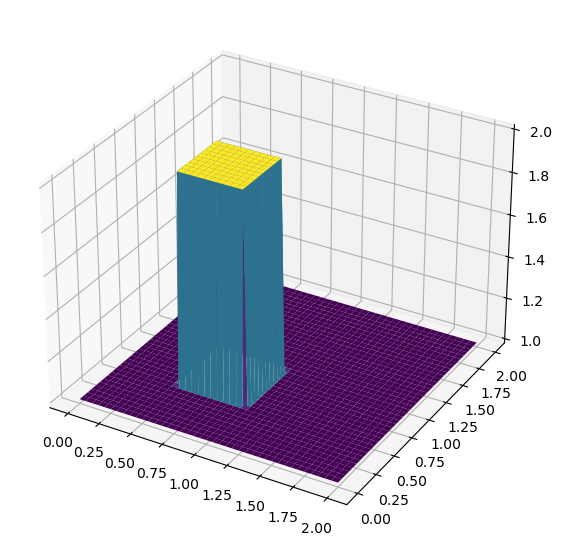

In [10]:
from mpl_toolkits.mplot3d import Axes3D    ## Permet de faire des représentations 3d

import numpy
from matplotlib import pyplot, cm
%matplotlib inline

### Declarations des variables
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))  ## 
un = numpy.ones((ny, nx)) ##

### Assigner les conditions aux limites

## Définir la fonction chapeau pour les conditions initiales   : u(.5<=x<=1 && .5<=y<=1 ) =2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

### Affichage de la condition initiale
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)


**Question** Ecrire une fonction de résolution de l'équation de convection en dimension 2.

\section{2-D Convection}

Nous résolvons maintenant la convection 2D, représentée par la paire d'équations aux dérivées partielles couplées ci-dessous :

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

La discrétisation de ces équations à l'aide des méthodes que nous avons appliquées précédemment donne :

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

En réarrangeant les deux équations, nous résolvons pour $u_{i,j}^{n+1}$ et $v_{i,j}^{n+1}$, respectivement. Notez que ces équations sont également couplées.

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

\subsection{Conditions initiales}

Les conditions initiales sont les mêmes que celles que nous avons utilisées pour la convection 1D, appliquées dans les directions x et y.

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{for } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}$$

\subsection{Conditions aux limites}

Les conditions aux limites maintiennent u et v égaux à 1 le long des frontières de la grille.

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

**Question** Résoudre l'équation de convection en dimension 2.

\section{2D Diffusion}
Et voici l'équation de diffusion 2D :

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

Vous vous souviendrez que nous avons trouvé une méthode pour discrétiser les dérivées du second ordre à l'étape 3, lors de l'étude de la diffusion 1-D. Nous allons utiliser le même schéma ici, avec notre différence de temps en avant et deux dérivées du second ordre.

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Encore une fois, nous réorganisons l'équation discrétisée et résolvons pour $u_{i,j}^{n+1}$

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

**Question** Résoudre l'équation de diffusion en dimension 2.

\section{Burgers' Equation in 2D}
L'équation de Burgers peut générer des solutions discontinues à partir d'une condition initiale lisse, c'est-à-dire qu'elle peut développer des "chocs". 

Observons cela en deux dimensions maintenant !

Voici l'ensemble couplé de PDE :

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

Chaque terme peut être discrétiser.

$$
\begin{split}
& \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

$$
\begin{split}
& \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

On réarrange chacune de ces équations pour la seule inconnue : les deux composantes $u,v$ de la solution au pas de temps suivant :

$$
\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

**Question** Résoudre l'équation de Burger's en dimension 2.

\section{Équation de Laplace 2D}

Voici l'équation de Laplace en 2D :

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$

On sait comment discrétiser une dérivée d'ordre 2. Mais pensez-y une minute - l'équation de Laplace a les caractéristiques typiques des phénomènes de diffusion. Pour cette raison, il doit être discrétisé avec des *différences centrales*, afin que la discrétisation soit cohérente avec la physique que nous voulons simuler.

L'équation discrétisée est :

$$\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0$$

Notez que l'équation de Laplace n'a pas de dépendance temporelle — il n'y a pas de $p^{n+1}$. Au lieu de suivre une onde dans le temps (comme dans les étapes précédentes), l'équation de Laplace calcule l'état d'équilibre d'un système dans les conditions aux limites fournies.

Si vous avez suivi des cours sur le transfert de chaleur, vous reconnaîtrez l'équation de Laplace comme l'équation de la chaleur en régime permanent.

Au lieu de calculer où le système sera à un moment donné $t$, nous allons résoudre itérativement pour $p_{i,j}^n$ jusqu'à ce qu'il remplisse une condition que nous spécifions. Le système n'atteindra l'équilibre que lorsque le nombre d'itérations tend vers $\infty$, mais nous pouvons approximer l'état d'équilibre en itérant jusqu'à ce que le changement entre une itération et la suivante soit *très* petit.

Réorganisons l'équation discrétisée, en résolvant pour $p_{i,j}^n$ :

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

L'utilisation de schémas de différence centrale du second ordre dans les deux sens est la méthode la plus largement appliquée pour l'opérateur de Laplace. Il est également connu sous le nom d'**opérateur de différence à cinq points**, faisant allusion à son pochoir.

Nous allons résoudre numériquement l'équation de Laplace en supposant partout un état initial de $p=0$. Ensuite, nous ajoutons des conditions aux limites comme suit :

$p=0$ chez $x=0$

$p=y$ chez $x=2$

$\frac{\partial p}{\partial y}=0$ chez $y=0, \ 1$

Dans ces conditions, il existe une solution analytique de l'équation de Laplace :

$$p(x,y)=\frac{x}{4}-4\sum_{n=1,odd}^{\infty}\frac{1}{(n\pi)^2\sinh2n\pi}\sinh n\pi x\cos n\pi y$$

\subsection{Exercice}

Écrivez un code pour résoudre l'équation de Poisson à l'aide de boucles, dans le style de codage utilisé dans nos premières leçons. Ensuite, considérez la démonstration de la façon de l'écrire à l'aide de fonctions (ci-dessous) et modifiez votre code dans ce style. Pouvez-vous penser à des raisons d'abandonner l'ancien style et d'adopter le codage modulaire ?

Autres conseils :

+ Visualisez chaque étape du processus itératif
+ Réfléchir à ce que font les conditions aux limites
+ Réfléchissez à ce que fait le PDE

\section{Équation de Poisson 2D}

L'équation de Poisson est obtenue en ajoutant un terme source au côté droit de l'équation de Laplace :

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$

Ainsi, en dissociant l'équation de Laplace, il existe une valeur finie à l'intérieur du champ qui affecte la solution. L'équation de Poisson agit pour "relâcher" les sources initiales dans le champ.

Sous forme discrétisée, cela ressemble presque à [Step 9](./12_Step_9.ipynb), à l'exception du terme source :

$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$

Comme précédemment, nous réorganisons ceci afin d'obtenir une équation pour $p$ au point $i,j$. Ainsi, nous obtenons :

$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

Nous allons résoudre cette équation en supposant un état initial de $p=0$ partout, et en appliquant les conditions aux limites comme suit :

$p=0$ à $x=0, \ 2$ et $y=0, \ 1$

et le terme source consiste en deux pics initiaux à l'intérieur du domaine, comme suit :

$b_{i,j}=100$ chez $i=\frac{1}{4}nx, j=\frac{1}{4}ny$

$b_{i,j}=-100$ chez $i=\frac{3}{4}nx, j=\frac{3}{4}ny$

$b_{i,j}=0$ partout ailleurs.

Les itérations avanceront en pseudo-temps pour relâcher les pics initiaux. La relaxation sous l'équation de Poisson devient de plus en plus lente à mesure qu'ils progressent. *Pourquoi ?*

**Question** Résoudre l'équation de Poisson en 2D

\section{Écoulement de la cavité avec Navier–Stokes}

Voici le système d'équations différentielles : deux équations pour les composantes de vitesse $u,v$ et une équation pour la pression :

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

\subsection{Discrétisation des équations}
Tout d'abord, discrétisons l'équation $u$-momentum, comme suit :

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\ 
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

De même pour l'équation $v$-momentum :

$$
\begin{split}
&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

Enfin, l'équation pression-Poisson discrétisée peut s'écrire ainsi :

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho \left[ \frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) -\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

Vous devriez écrire ces équations sur vos propres notes, à la main, en suivant mentalement chaque terme au fur et à mesure que vous l'écrivez.

Comme précédemment, réorganisons les équations de la manière dont les itérations doivent se dérouler dans le code. Tout d'abord, les équations de quantité de mouvement pour la vitesse au pas de temps suivant.

L'équation de quantité de mouvement dans la direction $u$ :

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right)
\end{split}
$$

L'équation de quantité de mouvement dans la direction $v$ :

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n})\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right)
\end{split}
$$

Nous réorganisons l'équation pression-Poisson :

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

La condition initiale est $u, v, p = 0$ partout, et les conditions aux limites sont :

$u=1$ à $y=2$ (le "couvercle");

$u, v=0$ sur les autres frontières ;

$\frac{\partial p}{\partial y}=0$ à $y=0$ ;

$p=0$ chez $y=2$

$\frac{\partial p}{\partial x}=0$ à $x=0,2$

## Résolution

In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx)) 
b = numpy.zeros((ny, nx))

L'équation de Poisson de pression écrite ci-dessus peut être difficile à écrire sans fautes de frappe. La fonction `build_up_b` ci-dessous représente le contenu des crochets, de sorte que l'intégralité de l'EPI est légèrement plus gérable.

In [ ]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

La fonction `pressure_poisson` est également définie pour aider à séparer les différentes séries de calculs. Notez la présence de la pseudo-variable de temps `nit`. Cette sous-itération dans le calcul de Poisson permet d'assurer un champ sans divergence.

In [ ]:
def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
        
    return p

Enfin, le reste des équations d'écoulement de cavité sont enveloppées dans la fonction "cavity_flow", ce qui nous permet de tracer facilement les résultats du solveur d'écoulement de cavité pour différentes durées.

In [2]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        
    return u, v, p

Commençons par `nt = 100` et voyons ce que le solveur nous donne :

In [ ]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

L'affichage peut se faire de la manière suivante :

In [ ]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');